In [1]:
import pandas as pd
import numpy as np

from numpy import average


#import the csv to pandas
file_path='/home/itay/salarySurvey/data/combined_survey_filtered_wout_outliers.xlsx'
df =pd.read_excel(file_path)



In [2]:
# enter the coulmns names as varibels:
# this may varay according to the different qustions you will ask in your survey (and therefore, different columns)

salary='שכר שעתי במשרת הסטודנט הראשונה (ש"ח לשעה)'
grade='ממוצע (נכון לתקופת חיפוש העבודה)'
bargin='האם התמקחת אחרי קבלת ההצעה?'
gender='מין'
year='שנת הצעת העבודה'
company='חברה (נא לכתוב באנגלית את שם החברה)'
courses='קורסי מפתח שעשית לפני הצעת העבודה'
exp='האם היה לך ניסיון לפני קבלת המשרה?'
sem='באיזה סמסטר היית כשקיבלת את ההצעה?'

ice_cream='טעם גלידה אהוב'

# choosing the rounding density in this analyze 
rounding_density=3

In [3]:
av_df=df[salary].astype(float).sum()/len(df)
av_df
print(f"avrg salary is {av_df}, the len of the df is :{len(df)}")

avrg salary is 94.15186246418338, the len of the df is :349


In [4]:
# basic functions for different usages:

from scipy.stats import ttest_ind


#calculate the average value of columnName column in df:
def calculate_average(df,column_name):
    num_of_rows=len(df)
    sum_of_rows=df[column_name].astype(float).sum()
    return sum_of_rows/num_of_rows # return the average value

def calculate_precentage_of_binary_answer(df,column_name,binary_field_answer):
    return len(df[df[column_name]==binary_field_answer])/ len(df)

def create_sorted_average_dict(dict,field):
    average_dict={}
    sorted_dict={}
    #calculate the average:
    for name in dict:
        average_dict[name]=calculate_average(dict[name],field)

    #sort:
    sorted_salary_list=sorted(average_dict.items(), key=lambda x: x[1])

    for tup in sorted_salary_list:
        average_rounded=round(tup[1],rounding_density)
        new_key= tup[0]+" "+str(average_rounded)
        sorted_dict[new_key]=tup[1] 
    return sorted_dict

# recive a dict of catagories and df for the catagory, and list of catagories in the dict, and print the result of T-test bewtween each pair 
# good only for dict based on numeric keys (need to implement '<')
def create_ttest_for_pairs(dict,list):
    for c_var in list:
        for c_var2 in list:
            # I want to print each pair just once, so print it only if the left bigger than the right one:            
            if c_var<c_var2:
                print(f"ttest values for {str(c_var)} and {str(c_var2)} is {ttest_ind(dict[c_var], dict[c_var2])}")

def create_ttest_for_pairs_without_numeric(dict,list):
    pairs={('a','b')}
    for c_var in list:
        for c_var2 in list:
            # I want to print each pair just once, so before printing I'm checking the pair wasn't already printed:         
            if (c_var,c_var2) not in pairs and (c_var2,c_var) not in pairs and c_var != c_var2:
                print(f"ttest values for {str(c_var)} and {str(c_var2)} is {print_ttest_result_rounded(ttest_ind(dict[c_var], dict[c_var2]))}")
                pairs.add((c_var,c_var2))

def print_ttest_result_rounded(ttest_result):
    return f"Ttest_result(statistic: {round(ttest_result.statistic,rounding_density)}, pvalue: {round(ttest_result.pvalue,rounding_density)})"

In [5]:
#calculate average salary and grades according to gender:

male_df= df.loc[df[gender]=='זכר']
female_df= df.loc[df['מין']=='נקבה']

average_salary_male = calculate_average(male_df,salary)
average_grade_male = calculate_average(male_df,grade)

average_salary_female = calculate_average(female_df,salary)
average_grade_female = calculate_average(female_df,grade)

print(average_salary_male)
print(average_grade_male)
print(average_salary_female)
print(average_grade_female)

print('num of mens:' +str(len(male_df)))
print('num of females:' +str(len(female_df)))

res = ttest_ind(male_df[salary], female_df[salary])

print(res)


95.03625954198473
84.42404580152672
92.46296296296296
83.09876543209876
num of mens:262
num of females:81
Ttest_indResult(statistic=1.0880802954064281, pvalue=0.2773280911762262)


In [6]:
#bargin presentage:

from unicodedata import name


precents_of_male_bargin=calculate_precentage_of_binary_answer(male_df,bargin,'כן')
precents_of_female_bargin=calculate_precentage_of_binary_answer(female_df,bargin,'כן')

bargin_m=male_df[male_df[bargin]=='כן']
n_bargin_m=male_df[male_df[bargin]=='לא']
bargin_f=female_df[female_df[bargin]=='כן']
n_bargin_f=female_df[female_df[bargin]=='לא']


print("bargin man avreage salary: "+str(calculate_average( bargin_m,salary))+ '   Amount:'+str(len(bargin_m)))
print("didn't bargin man avreage salary: "+str(calculate_average( n_bargin_m,salary))+ '   Amount:'+str(len(n_bargin_m)))
print("bargin woman avreage salary: "+str(calculate_average( bargin_f,salary))+ '   Amount:'+str(len(bargin_f)))
print("didn't bargin woman avreage salary: "+ str(calculate_average( n_bargin_f,salary))+ '   Amount:'+str(len(n_bargin_f)))


# checking for t-test values for the resutls:

bargin_keys=['bargin_m','n_bargin_m','bargin_f','n_bargin_f']
bargin_dict={}
bargin_dict['bargin_m']=male_df[male_df[bargin]=='כן'][salary]
bargin_dict['n_bargin_m']=male_df[male_df[bargin]=='לא'][salary]
bargin_dict['bargin_f']=female_df[female_df[bargin]=='כן'][salary]
bargin_dict['n_bargin_f']=female_df[female_df[bargin]=='לא'][salary]

create_ttest_for_pairs_without_numeric(bargin_dict,bargin_keys)


bargin man avreage salary: 94.12264150943396   Amount:53
didn't bargin man avreage salary: 95.61463414634146   Amount:205
bargin woman avreage salary: 85.71923076923076   Amount:26
didn't bargin woman avreage salary: 95.39245283018869   Amount:53
ttest values for bargin_m and n_bargin_m is Ttest_result(statistic: -0.501, pvalue: 0.617)
ttest values for bargin_m and bargin_f is Ttest_result(statistic: 1.912, pvalue: 0.06)
ttest values for bargin_m and n_bargin_f is Ttest_result(statistic: -0.39, pvalue: 0.698)
ttest values for n_bargin_m and bargin_f is Ttest_result(statistic: 2.477, pvalue: 0.014)
ttest values for n_bargin_m and n_bargin_f is Ttest_result(statistic: 0.078, pvalue: 0.938)
ttest values for bargin_f and n_bargin_f is Ttest_result(statistic: -2.642, pvalue: 0.01)


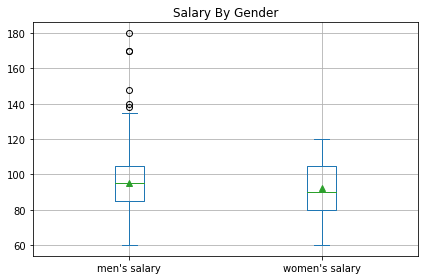

In [7]:
# Create a boxplot:

import matplotlib.pyplot as plt
man_salarys=male_df[[salary]].astype(float)
fman_salarys=female_df[[salary]].astype(float)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
combined_dfs = pd.DataFrame({"men\'s salary": male_df[salary].astype(float), "women\'s salary": female_df[salary].astype(float)})

# Plot the dataframe
ax = combined_dfs[['men\'s salary', 'women\'s salary']].plot(kind='box',grid=True, showmeans=True,title='Salary By Gender')

# Display the plot
plt.show()

In [8]:
#get outliers cleaned for the scatter point:
scatter_df=df
scatter_df[scatter_df[salary]>160]
scatter_df = scatter_df.drop(scatter_df[scatter_df[salary]>160].index)

In [9]:
#clean people who didn't fill salary or grade:

scatter_df=scatter_df[scatter_df[grade].notna()]
scatter_df=scatter_df[scatter_df[salary].notna()]
scatter_df

,Timestamp,מסלול לימודים,באיזה סמסטר היית כשקיבלת את ההצעה?,ממוצע (נכון לתקופת חיפוש העבודה),האם ביקשו גיליון ציונים?,קורסי מפתח שעשית לפני הצעת העבודה,האם היה לך ניסיון לפני קבלת המשרה?,"שכר שעתי במשרת הסטודנט הראשונה (ש""ח לשעה)",האם התמקחת אחרי קבלת ההצעה?,חברה (נא לכתוב באנגלית את שם החברה),תחום המשרה,מין,טעם גלידה אהוב,שנת הצעת העבודה
0,2021-09-23 20:57:12.906,"מדמ""ח פיסיקה",5.0,70.0,לא,"מת""מ, מבני נתונים, הפעלה, אלגו",ניסיון רלוונטי מהצבא,70.0,לא,Rafael,Embedded,נקבה,NaN,2019.0
1,2021-09-21 14:49:16.843,"מדמ""ח",8.0,70.0,לא,"מת""מ, מבני נתונים, הפעלה, אלגו",ללא ניסיון כלל,95.0,לא,Odysii,Software Development,זכר,NaN,2021.0
2,2022-08-16 16:52:11.865,"מדמ""ח",3.0,72.0,כן,"מת""מ, מבני נתונים",ללא ניסיון כלל,65.0,לא,Rafael,Software Development,זכר,בייגלה מלוח - קרמל,2022.0
3,2021-09-25 17:15:43.317,"מתמטיקה -מדמ""ח",5.0,72.0,כן,"מת""מ, מבני נתונים, הפעלה",ללא ניסיון כלל,75.0,כן,לא רוצה לשתף,QA automation,נקבה,NaN,2019.0
4,2022-08-16 13:22:58.222,"מדמ""ח",4.0,72.0,לא,"מת""מ, מבני נתונים",ניסיון רלוונטי מהצבא,90.0,לא,Nimble,Software Development,נקבה,פיסטוק,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,2022-08-16 17:28:55.389,"מדמ""ח - מתמטיקה",4.0,96.0,כן,"מבני נתונים, אלגו",ללא ניסיון כלל,100.0,לא,StarkWare,Software Development,זכר,פיסטוק,2022.0
337,2021-09-21 11:25:35.325,הנדסת מחשבים,4.0,96.0,כן,"מת""מ, מבני נתונים, הפעלה, אלגו",ללא ניסיון כלל,100.0,לא,Intel,Software Development,זכר,NaN,2019.0
338,2022-08-16 14:07:35.665,"מדמ""ח",3.0,96.0,כן,"מת""מ",ניסיון רלוונטי מהצבא,120.0,לא,Microsoft,Software Development,זכר,פיסטוק,2022.0
339,2021-09-21 13:09:33.243,"מדמ""ח",5.0,97.0,כן,"מת""מ, מבני נתונים, הפעלה, אלגו",ללא ניסיון כלל,110.0,לא,Microsoft,Software Development,זכר,NaN,2020.0


In [10]:
scatter_df[scatter_df[salary]>160]

,Timestamp,מסלול לימודים,באיזה סמסטר היית כשקיבלת את ההצעה?,ממוצע (נכון לתקופת חיפוש העבודה),האם ביקשו גיליון ציונים?,קורסי מפתח שעשית לפני הצעת העבודה,האם היה לך ניסיון לפני קבלת המשרה?,"שכר שעתי במשרת הסטודנט הראשונה (ש""ח לשעה)",האם התמקחת אחרי קבלת ההצעה?,חברה (נא לכתוב באנגלית את שם החברה),תחום המשרה,מין,טעם גלידה אהוב,שנת הצעת העבודה


In [11]:
#calculate average salary and grades according to gender:
df = scatter_df
male_df= df.loc[df[gender]=='זכר']
female_df= df.loc[df['מין']=='נקבה']

average_salary_male = calculate_average(male_df,salary)
average_grade_male = calculate_average(male_df,grade)

average_salary_female = calculate_average(female_df,salary)
average_grade_female = calculate_average(female_df,grade)

print(average_salary_male)
print(average_grade_male)
print(average_salary_female)
print(average_grade_female)

print('num of mens:' +str(len(male_df)))
print('num of females:' +str(len(female_df)))

res = ttest_ind(male_df[salary], female_df[salary])

print(res)


94.03346456692914
86.03937007874016
92.49375
84.1375
num of mens:254
num of females:80
Ttest_indResult(statistic=0.6953396020090512, pvalue=0.4873288958657256)


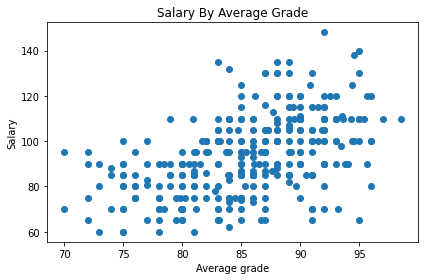

In [12]:
#plot scatter points:
x=scatter_df[grade].astype(float)
y=scatter_df[salary].astype(float)
plt.scatter(x,y)
plt.title("Salary By Average Grade")
plt.xlabel("Average grade")
plt.ylabel("Salary")
plt.show()

In [13]:
#check correlation between salary and grades using pearsonr test:

from scipy.stats import pearsonr
grades=scatter_df[grade].astype(float).dropna()
salaris=scatter_df[salary].astype(float).dropna()
pearsonr(grades, salaris )

(0.5006559845489419, 7.612977142887622e-23)

In [14]:
#calculate num of exmples from each company:
temp_df=df
num_of_examples={}
companies_names=['Intel','Microsoft','Amazon','Google','Facebook','Apple','IBM','Rafael','Elbit','Plus500','Nvidia','Mobileye']
for company_name in companies_names:
        num_of_examples[company_name]=len(temp_df[temp_df[company]==company_name])
print(num_of_examples)


{'Intel': 80, 'Microsoft': 16, 'Amazon': 22, 'Google': 2, 'Facebook': 2, 'Apple': 11, 'IBM': 11, 'Rafael': 40, 'Elbit': 15, 'Plus500': 2, 'Nvidia': 13, 'Mobileye': 9}


In [15]:
#get the calculate companies average:

from cmath import nan


companies_dict={}
companies_names=['Intel','Microsoft','Amazon','Apple','IBM','Rafael','Elbit','Nvidia','Mobileye']

for company_name in companies_names:
    companies_dict[company_name]=df[df[company]==company_name]

In [16]:

sorted_salaries_companies=create_sorted_average_dict(companies_dict,salary)


In [17]:
# bar plot - not neeeded:

#fig=plt.figure(figsize=(15,5))
#plt.bar(sorted_salaries_companies.keys(), sorted_salaries_companies.values(), color ='maroon',
#        width = 0.4)
# 
#plt.xlabel("Companies")
#plt.ylabel("Average Salary")
#plt.title("Companies average Salaries")
#plt.show()


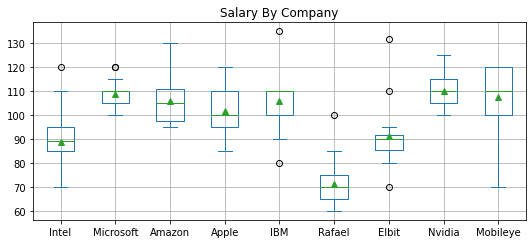

In [18]:
# box plot by company:

import matplotlib.pyplot as plt

for current_company in companies_dict:
    current_df=companies_dict[current_company]
    companies_dict[current_company]=(current_df[salary]).astype(float)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
combined_dfs=pd.DataFrame(companies_dict)
# Plot the dataframe
ax = combined_dfs.plot(kind='box',grid=True,showmeans=True,title='Salary By Company')

# Display the plot
plt.show()

In [19]:
ice_cream_df_dict={}
ice_ceam_names=['בייגלה מלוח - קרמל','פיסטוק','וניל עוגיות','בצק עוגיות','שוקולד בראוניס']

for ice_cream_name in ice_ceam_names:
    ice_cream_df_dict[ice_cream_name]=df[df[ice_cream]==ice_cream_name]    

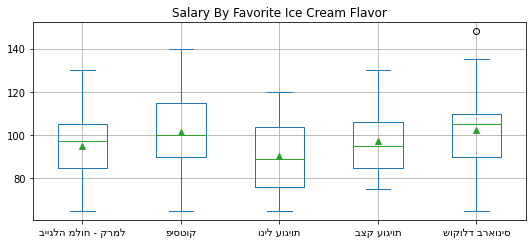

In [20]:
import matplotlib.pyplot as plt


for flavor in ice_cream_df_dict:
    c_df=ice_cream_df_dict[flavor]
    ice_cream_df_dict[flavor]=(c_df[salary]).astype(float)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
combined_dfs=pd.DataFrame(ice_cream_df_dict)
# Plot the dataframe
ax = combined_dfs.plot(kind='box',grid=True, showmeans=True,title='Salary By Favorite Ice Cream Flavor')

# Display the plot
plt.show()

In [21]:
#sorted_salaries_companies=create_sorted_average_dict(ice_cream_df_dict,salary)


In [22]:
print(sorted_salaries_companies)

{'Rafael 71.275': 71.275, 'Intel 88.746': 88.74625, 'Elbit 91.467': 91.46666666666667, 'Apple 101.818': 101.81818181818181, 'IBM 105.909': 105.9090909090909, 'Amazon 106.0': 106.0, 'Mobileye 107.778': 107.77777777777777, 'Microsoft 108.75': 108.75, 'Nvidia 110.0': 110.0}


In [23]:
mtm='מת"מ'
mivni='מבני נתונים'
operation_s='הפעלה'
algo='אלגו'

df_by_courses={}
courses_names=[mtm,mivni,operation_s,algo]

for course in courses_names:
    df_by_courses[course] = df.loc[df[courses].str.contains(course,na=False)]

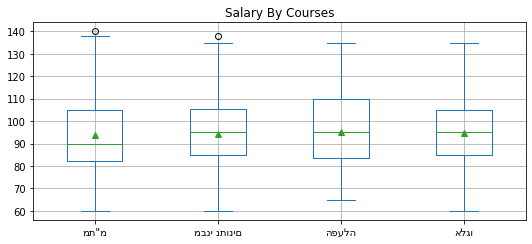

In [24]:
courses_average_dict = create_sorted_average_dict(dict=df_by_courses,field= salary)

courses_dict={}

for course in courses_names:
    courses_dict[course]=(df.loc[df[courses].str.contains(course,na=False)][salary]).astype(float)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
#combined_dfs = pd.DataFrame({"Intel": companies_dict["Intel"].astype(float), "Mobilay": companies_dict["Mobileye"].astype(float)})
combined_dfs=pd.DataFrame(courses_dict)
# Plot the dataframe
ax = combined_dfs.plot(kind='box',grid=True, showmeans=True,title='Salary By Courses')

# Display the plot
plt.show()

In [25]:
courses_average_dict = create_sorted_average_dict(dict=df_by_courses,field= salary)
print(courses_average_dict)


{'מת"מ 93.73': 93.72981366459628, 'מבני נתונים 94.401': 94.40068493150685, 'אלגו 94.531': 94.53081395348836, 'הפעלה 95.032': 95.03192771084336}


In [26]:
#no_exp='ללא ניסיון כלל'
#no_exp_df=df[df[exp]==no_exp]
#
#no_exp_courses_dict={}
#
#for key in df_by_courses:
#    current_course_df=df_by_courses[key]
#    no_exp_courses_dict[key] = current_course_df[current_course_df[exp]==no_exp]
#
#
#courses_noexp_average_dict = create_sorted_average_dict(dict=no_exp_courses_dict,field= salary)
#print(courses_noexp_average_dict)
#
#for course in courses_names:
#    courses_dict[course]=(no_exp_df.loc[no_exp_df[courses].str.contains(course,na=False)][salary]).astype(float)
#
## Set the figure size
#plt.rcParams["figure.figsize"] = [7.50, 3.50]
#plt.rcParams["figure.autolayout"] = True
#
## Pandas dataframe
##combined_dfs = pd.DataFrame({"Intel": companies_dict["Intel"].astype(float), "Mobilay": companies_dict["Mobileye"].astype(float)})
#combined_dfs=pd.DataFrame(courses_dict)
## Plot the dataframe
#ax = combined_dfs.plot(kind='box',grid=True, showmeans=True,title='Salary By Courses (only people without experience)')
#
## Display the plot
#plt.show()

{'מת"מ 93.044': 93.04362934362933, 'מבני נתונים 93.855': 93.85541666666667, 'אלגו 94.409': 94.40928571428572, 'הפעלה 94.786': 94.78582089552238}


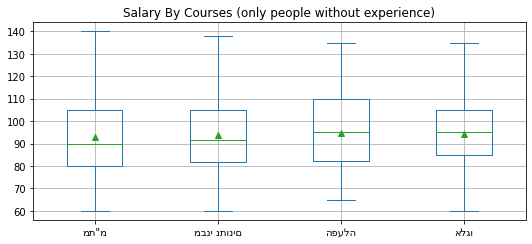

In [27]:
no_exp='ללא ניסיון כלל'
no_exp_df=df[df[exp]==no_exp]

no_exp_courses_dict={}

for key in df_by_courses:
    current_course_df=df_by_courses[key]
    no_exp_courses_dict[key] = current_course_df[current_course_df[exp]==no_exp]


courses_noexp_average_dict = create_sorted_average_dict(dict=no_exp_courses_dict,field= salary)
print(courses_noexp_average_dict)

for course in courses_names:
    courses_dict[course]=(no_exp_df.loc[no_exp_df[courses].str.contains(course,na=False)][salary]).astype(float)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
#combined_dfs = pd.DataFrame({"Intel": companies_dict["Intel"].astype(float), "Mobilay": companies_dict["Mobileye"].astype(float)})
combined_dfs=pd.DataFrame(courses_dict)
# Plot the dataframe
ax = combined_dfs.plot(kind='box',grid=True, showmeans=True,title='Salary By Courses (only people without experience)')

# Display the plot
plt.show()

In [28]:
def checkBySemster(semester_num):
    #sem5 no exp
    semster=semester_num
    sem_df=no_exp_df[no_exp_df[sem]==semster]

    sem5_courses_dict={}

    for key in df_by_courses:
        current_course_df=df_by_courses[key]
        sem5_courses_dict[key] = current_course_df[current_course_df[exp]==semster]


    sem_average_dict = create_sorted_average_dict(dict=sem5_courses_dict,field= salary)
    print(sem_average_dict)

    for course in courses_names:
        courses_dict[course]=(sem_df.loc[sem_df[courses].str.contains(course,na=False)][salary]).astype(float)

    # Set the figure size
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True

    # Pandas dataframe
    #combined_dfs = pd.DataFrame({"Intel": companies_dict["Intel"].astype(float), "Mobilay": companies_dict["Mobileye"].astype(float)})
    combined_dfs=pd.DataFrame(courses_dict)
    # Plot the dataframe
    ax = combined_dfs.plot(kind='box',grid=True, showmeans=True,title='Salary By Courses (only people from semster '+str(semester_num)+' )')

    # Display the plot
    plt.show()

{'מת"מ nan': nan, 'מבני נתונים nan': nan, 'הפעלה nan': nan, 'אלגו nan': nan}


/home/itay/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


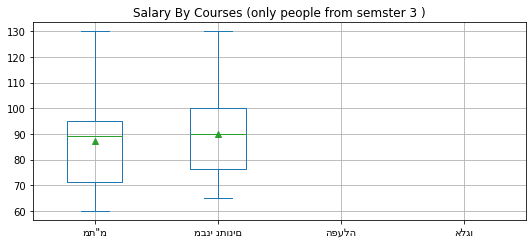

In [29]:
#sem5 no exp
checkBySemster(3)

/home/itay/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


{'מת"מ nan': nan, 'מבני נתונים nan': nan, 'הפעלה nan': nan, 'אלגו nan': nan}


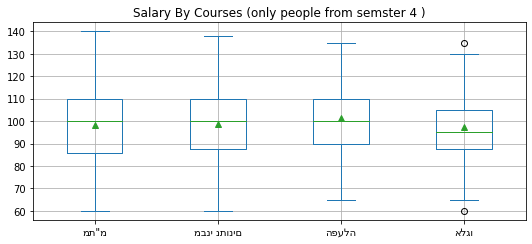

In [30]:
checkBySemster(4)

/home/itay/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


{'מת"מ nan': nan, 'מבני נתונים nan': nan, 'הפעלה nan': nan, 'אלגו nan': nan}


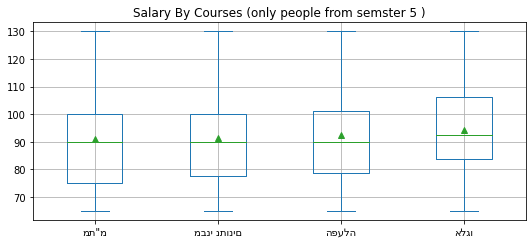

In [31]:
checkBySemster(5)

{'מת"מ nan': nan, 'מבני נתונים nan': nan, 'הפעלה nan': nan, 'אלגו nan': nan}


/home/itay/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


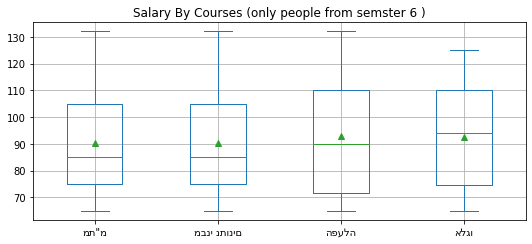

In [32]:
checkBySemster(6)

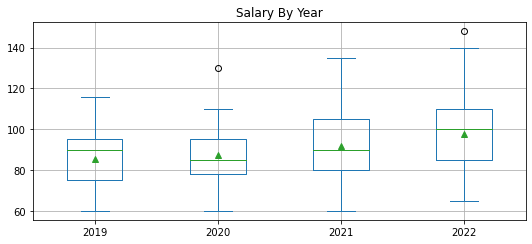

In [33]:
dict_df_years={}
years=[2019,2020,2021,2022]

for c_year in years:
        dict_df_years[c_year]=(df[df[year]==c_year][salary]).astype(float)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
#combined_dfs = pd.DataFrame({"Intel": companies_dict["Intel"].astype(float), "Mobilay": companies_dict["Mobileye"].astype(float)})
combined_dfs=pd.DataFrame(dict_df_years)
# Plot the dataframe
ax = combined_dfs.plot(kind='box', showmeans=True,grid=True,title='Salary By Year')

# Display the plot
plt.show()

In [34]:
for c_year in years:
    print(f"len of {c_year} is {len(dict_df_years[c_year])} and mean is {dict_df_years[c_year].mean()}")

len of 2019 is 24 and mean is 85.45
len of 2020 is 49 and mean is 87.13673469387754
len of 2021 is 102 and mean is 91.62745098039215
len of 2022 is 162 and mean is 97.57716049382717


In [35]:
create_ttest_for_pairs(dict_df_years,years)

ttest values for 2019 and 2020 is Ttest_indResult(statistic=-0.4673949584649041, pvalue=0.6416486835876469)
ttest values for 2019 and 2021 is Ttest_indResult(statistic=-1.6377511198695034, pvalue=0.1040088400005087)
ttest values for 2019 and 2022 is Ttest_indResult(statistic=-3.2511777924486447, pvalue=0.001366893580036142)
ttest values for 2020 and 2021 is Ttest_indResult(statistic=-1.5635309805688562, pvalue=0.12004917405785712)
ttest values for 2020 and 2022 is Ttest_indResult(statistic=-3.7819071225555145, pvalue=0.0002031432123497768)
ttest values for 2021 and 2022 is Ttest_indResult(statistic=-2.705575237069183, pvalue=0.007265987154072128)


In [36]:
#General info for the doc:

print(f"The average salary in 2022 is {dict_df_years[2022].mean()}, and N of 2022 is : {len(dict_df_years[2022])}")
df22=df[df[year]==2022]
df2022_n_prior_exp=df22[df22[exp]==no_exp]
print(f"The average salary in 2022 without prior exp is {df2022_n_prior_exp[salary].mean()}, and N of 2022 is : {len(df2022_n_prior_exp)}")

The average salary in 2022 is 97.57716049382717, and N of 2022 is : 162
The average salary in 2022 without prior exp is 97.436, and N of 2022 is : 125
